In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm


tqdm.pandas()

### Import Bootsrap Results

In [ ]:
#  import all the data from bootstrap results
image_df = pd.read_csv("/vol/bitbucket/yl28218/thesis/mimic_cxr_exp/bootstrap_results/summary_image_only_exp1.csv")
image_text_df = pd.read_csv("/vol/bitbucket/yl28218/thesis/mimic_cxr_exp/bootstrap_results/summary_image_text_exp1.csv")
image_text_meta_df = pd.read_csv("/vol/bitbucket/yl28218/thesis/mimic_cxr_exp/bootstrap_results/summary_image_text_meta_exp1.csv")
report_df = pd.read_csv("/vol/bitbucket/yl28218/thesis/mimic_cxr_exp/bootstrap_results/summary_text_exp1.csv")
metadata_df = pd.read_csv("/vol/bitbucket/yl28218/thesis/mimic_cxr_exp/bootstrap_results/summary_meta_exp1.csv")
report_metadata_df = pd.read_csv("/vol/bitbucket/yl28218/thesis/mimic_cxr_exp/bootstrap_results/summary_report_metadata_exp1.csv")
image_metadata_df = pd.read_csv("/vol/bitbucket/yl28218/thesis/mimic_cxr_exp/bootstrap_results/summary_image_metadata_exp1.csv")
baseline_df = pd.read_csv("/vol/bitbucket/yl28218/thesis/mimic_cxr_exp/bootstrap_results/summary_baseline_exp1.csv")

precision_df = pd.read_csv("/vol/bitbucket/yl28218/thesis/mimic_cxr_exp/bootstrap_results/precision_log_exp3_1.csv")



In [ ]:
precision_df_20 = precision_df[precision_df["test_ratio"] == "20%"]
precision_df_20.head()
precision_df_10 = precision_df[precision_df["test_ratio"] == "10%"]
precision_df_5 = precision_df[precision_df["test_ratio"] == "5%"]
total_counts = len(precision_df_20)
print(total_counts)

### Token Analysis

In [ ]:
def get_top_token_tables(dfs, slice_names, total, ratios=["20%", "10%", "5%"]):
    """
    dfs: list of summary DataFrames (each with 'test_ratio', 'token', 'freq_in_top20')
    slice_names: list of embedding type names
    ratios: which test_ratio to include
    
    Returns: dict {ratio: DataFrame}
    """
    ratio_tables = {}
    for ratio in ratios:
        rows = []
        for df, name in zip(dfs, slice_names):
            df_r = df[df["test_ratio"] == ratio]
            if len(df_r) > 0:
                # 取 freq_in_top20 最大的那个 token
                top_row = df_r.sort_values("freq_in_top20", ascending=False).iloc[0]
                rows.append({
                    "Embedding Type": name,
                    "Top Token": top_row["token"],
                    "Frequency": top_row["freq_in_top20"]/total
                })
        ratio_tables[ratio] = pd.DataFrame(rows)
    return ratio_tables


# === Example usage ===
dfs = [
    image_df, image_text_df, image_text_meta_df,
    report_df, metadata_df, report_metadata_df, image_metadata_df, baseline_df
]
slice_names = [
    "Image Only", "Image+Text", "Image+Text+Meta",
    "Report", "Metadata", "Report+Metadata", "Image+Metadata", "Baseline"
]

tables = get_top_token_tables(dfs, slice_names, total_counts)


for ratio, table in tables.items():
    print(f"\n=== Top Tokens for {ratio} ===")
    print(table)


### Visualization

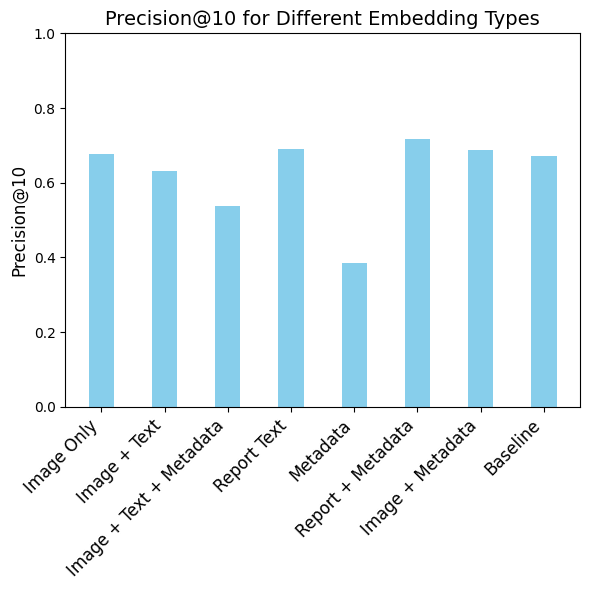

In [51]:
k = 10
precision_df_means = precision_df_20[["precision_k_image_only", "precision_k_image_text", "precision_k_image_text_meta", "precision_k_report_text","precision_k_metadata","precision_k_report_metadata", "precision_k_image_metadata", "precision_k_baseline"]].mean()
embedding_types = [
    "Image Only",
    "Image + Text",
    "Image + Text + Metadata",
    "Report Text",
    "Metadata",
    "Report + Metadata",
    "Image + Metadata",
    "Baseline"

    
]

plt.figure(figsize=(6, 6))
bars = plt.bar(embedding_types, precision_df_means, color='skyblue',width=0.4)

# for bar, value in zip(bars, precision_values):
#     plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
#              f"{value:.4f}", ha='center', va='bottom', fontsize=12)

plt.title(f"Precision@{k} for Different Embedding Types", fontsize=14)
plt.ylabel(f"Precision@{k}", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()

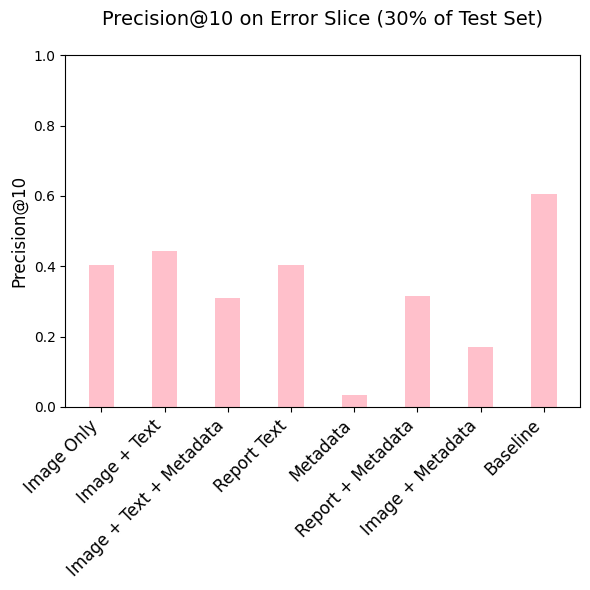

In [54]:
k = 10
precision_df_means_20 = precision_df_20[["precision_k_image_only", "precision_k_image_text", "precision_k_image_text_meta", "precision_k_report_text","precision_k_metadata","precision_k_report_metadata", "precision_k_image_metadata", "precision_k_baseline"]].mean()
precision_df_means_30 = precision_df_10[["precision_k_image_only", "precision_k_image_text", "precision_k_image_text_meta", "precision_k_report_text","precision_k_metadata","precision_k_report_metadata", "precision_k_image_metadata", "precision_k_baseline"]].mean()
embedding_types = [
    "Image Only",
    "Image + Text",
    "Image + Text + Metadata",
    "Report Text",
    "Metadata",
    "Report + Metadata",
    "Image + Metadata",
    "Baseline"


    
]

plt.figure(figsize=(6, 6))
bars = plt.bar(embedding_types, precision_df_means_30, color="pink",width=0.4)

# for bar, value in zip(bars, precision_values):
#     plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
#              f"{value:.4f}", ha='center', va='bottom', fontsize=12)

plt.title(
    f"Precision@{k} on Error Slice (30% of Test Set)\n",
    fontsize=14
)
plt.ylabel(f"Precision@{k}", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()

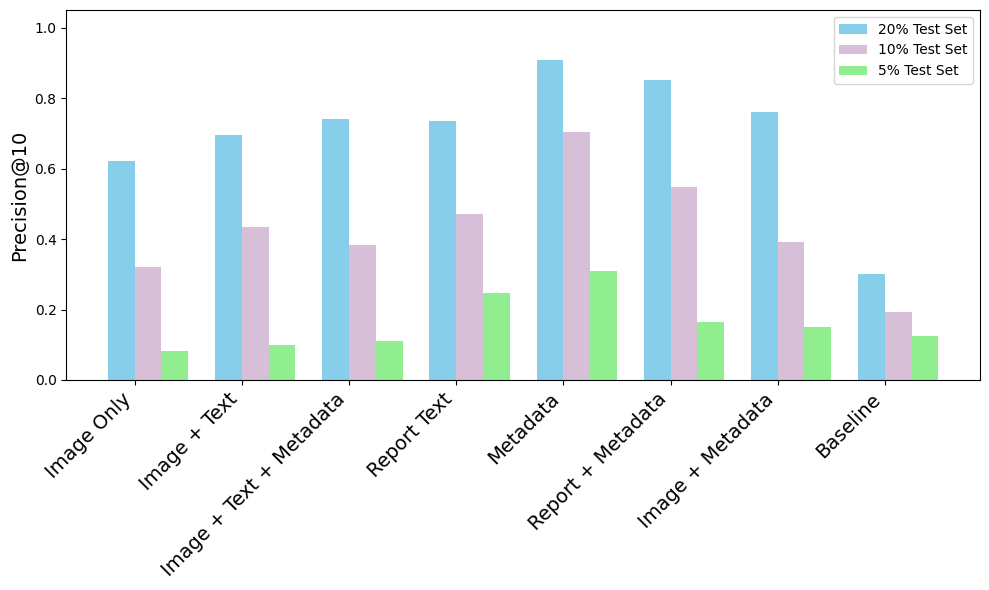

In [ ]:
precision_df_means_20 = precision_df_20[["precision_k_image_only", "precision_k_image_text", "precision_k_image_text_meta", "precision_k_report_text","precision_k_metadata","precision_k_report_metadata", "precision_k_image_metadata", "precision_k_baseline"]].mean()
precision_df_means_10 = precision_df_10[["precision_k_image_only", "precision_k_image_text", "precision_k_image_text_meta", "precision_k_report_text","precision_k_metadata","precision_k_report_metadata", "precision_k_image_metadata", "precision_k_baseline"]].mean()
precision_df_means_5 = precision_df_5[["precision_k_image_only", "precision_k_image_text", "precision_k_image_text_meta", "precision_k_report_text","precision_k_metadata","precision_k_report_metadata", "precision_k_image_metadata", "precision_k_baseline"]].mean()

means_20 = precision_df_means_20.values
means_10 = precision_df_means_10.values
means_5 = precision_df_means_5.values

embedding_types = [
    "Image Only",
    "Image + Text",
    "Image + Text + Metadata",
    "Report Text",
    "Metadata",
    "Report + Metadata",
    "Image + Metadata",
    "Baseline"
]

x = np.arange(len(embedding_types)) 
width = 0.25 

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x - width/2, means_20, width, label="20% Test Set", color="skyblue")
bars2 = plt.bar(x + width/2, means_10, width, label="10% Test Set", color="thistle")
bars3 = plt.bar(x + width*1.5, means_5, width, label="5% Test Set", color="lightgreen")



#plt.title(f"Precision@{k} on Correlation Error Slice", fontsize=14)
plt.ylabel(f"Precision@{k}", fontsize=14)
plt.xticks(x, embedding_types, rotation=45, ha='right', fontsize=14)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

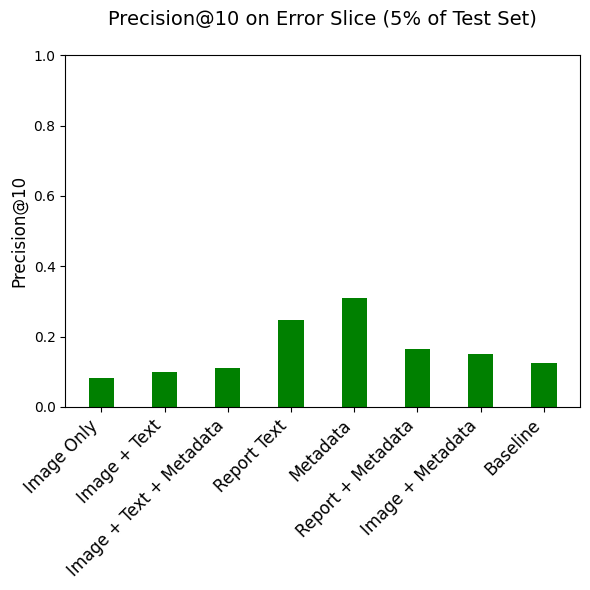

In [30]:
k = 10
precision_df_means = precision_df_5[["precision_k_image_only", "precision_k_image_text", "precision_k_image_text_meta", "precision_k_report_text","precision_k_metadata","precision_k_report_metadata", "precision_k_image_metadata", "precision_k_baseline"]].mean()
embedding_types = [
    "Image Only",
    "Image + Text",
    "Image + Text + Metadata",
    "Report Text",
    "Metadata",
    "Report + Metadata",
    "Image + Metadata",
    "Baseline"

    
]

plt.figure(figsize=(6, 6))
bars = plt.bar(embedding_types, precision_df_means, color="green",width=0.4)

# for bar, value in zip(bars, precision_values):
#     plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
#              f"{value:.4f}", ha='center', va='bottom', fontsize=12)

plt.title(
    f"Precision@{k} on Error Slice (5% of Test Set)\n",
    fontsize=14
)
plt.ylabel(f"Precision@{k}", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1)  
plt.tight_layout()
plt.show()

### Descriptive Statistics

In [ ]:


print(f"Mean precision@k for image only: {precision_df_20['precision_k_image_only'].mean()}")
print(f"Mean precision@k for image and text: {precision_df_20['precision_k_image_text'].mean()}")
print(f"Mean precision@k for image, text and meta: {precision_df_20['precision_k_image_text_meta'].mean()}")
print(f"Mean precision@k for report text: {precision_df_20['precision_k_report_text'].mean()}")
print(f"Mean precision@k for metadata: {precision_df_20['precision_k_metadata'].mean()}")
print(f"Mean precision@k for report metadata: {precision_df_20['precision_k_report_metadata'].mean()}")
print(f"Mean precision@k for image metadata: {precision_df_20['precision_k_image_metadata'].mean()}")
print(f"Mean precision@k for baseline: {precision_df_20['precision_k_baseline'].mean()}")

In [ ]:
# 95% confidence interval for precision@k
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    h = std_err * 1.96  # for 95% CI
    return mean - h, mean + h
 


In [ ]:

# Calculate confidence intervals
ci_image_only = confidence_interval(precision_df_20['precision_k_image_only'])
ci_image_text = confidence_interval(precision_df_20['precision_k_image_text'])
ci_image_text_meta = confidence_interval(precision_df_20['precision_k_image_text_meta'])
ci_report_text = confidence_interval(precision_df_20['precision_k_report_text'])
ci_metadata = confidence_interval(precision_df_20['precision_k_metadata'])
ci_report_metadata = confidence_interval(precision_df_20['precision_k_report_metadata'])
ci_image_metadata = confidence_interval(precision_df_20['precision_k_image_metadata'])